In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

/Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ap = pd.read_csv('./AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

In [3]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


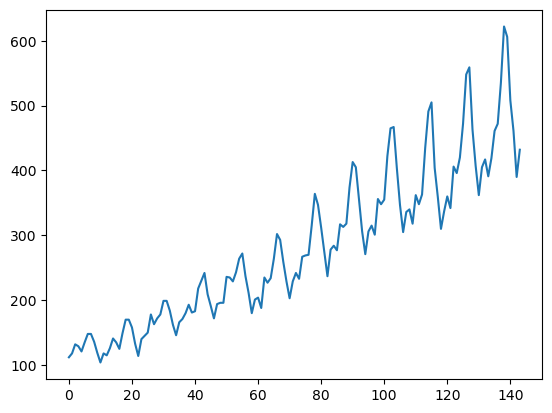

In [4]:
plt.plot(ap)
plt.show()

In [5]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)

In [6]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


[]

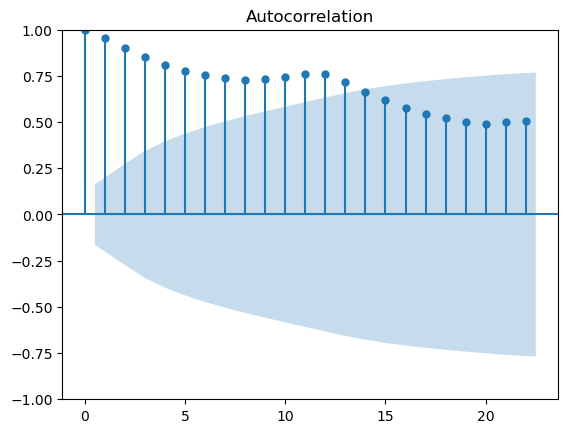

In [7]:
plot_acf(ap_transformed)
plt.plot()

# acf plot, 점차 감소하는 모양새를 지니고 있음

[]

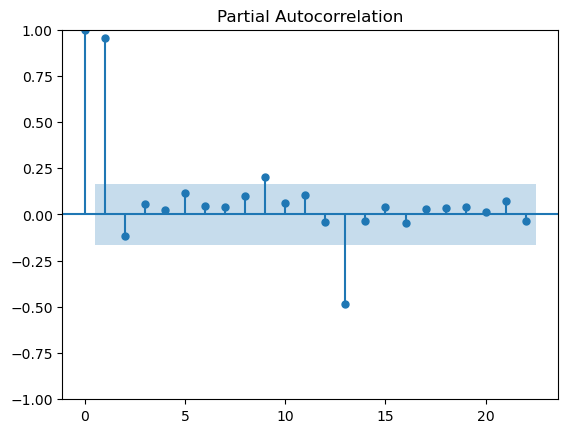

In [8]:
plot_pacf(ap_transformed)
plt.plot()

# pacf plot, lag 2까지 유의미한 결과를 보임

**차분을 통해 분석**

In [9]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

[]

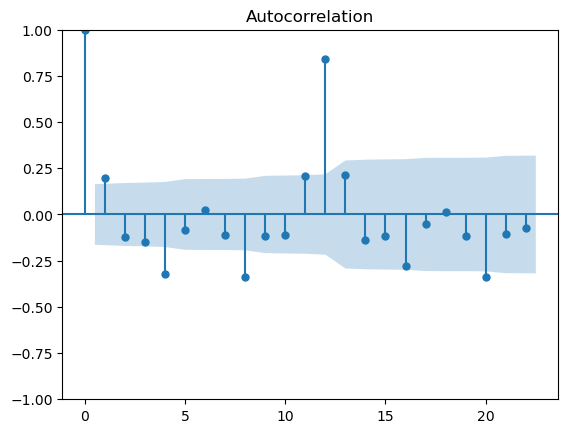

In [10]:
plot_acf(ap_diff)
plt.plot()

# lag 1과 lag 12에서 유의미한 lag가 포착됨

[]

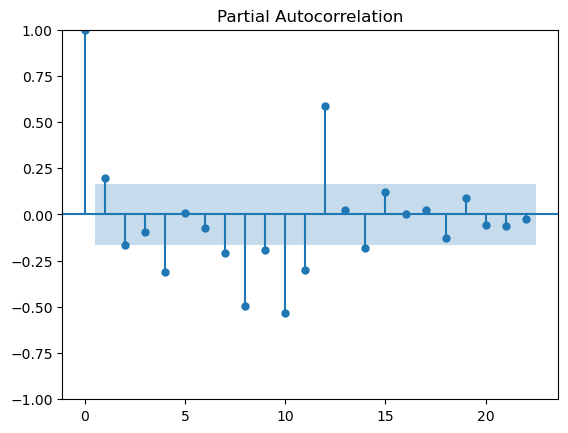

In [11]:
plot_pacf(ap_diff)
plt.plot()

# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨

In [12]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [13]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

**Auto ARIMA 적용**

In [14]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-212.316, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.535, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.233, Time=0.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.542, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.03 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-218.627, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.08 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.479, Time=0.07 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

In [15]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
115    6.179830
116    6.199175
117    6.131458
118    6.064501
119    6.122140
120    6.127731
121    6.101432
122    6.157535
123    6.141050
124    6.094311
125    6.142619
126    6.132571
127    6.094458
128    6.146302
129    6.137098
130    6.096441
131    6.144590
132    6.135659
133    6.095916
134    6.143838
135    6.136430
136    6.096917
137    6.143288
138    6.136526
139    6.097211
140    6.142467
141    6.136727
142    6.097771
143    6.141842
dtype: float64
--------------------------------------------------------------------------------
[[6.01808394 6.34157701]
 [5.92822128 6.47012962]
 [5.77128733 6.49162966]
 [5.65253937 6.47646176]
 [5.68275334 6.56152716]
 [5.66567265 6.58978857]
 [5.61385782 6.5890065 ]
 [5.64425776 6.67081287]
 [5.59865202 6.6834

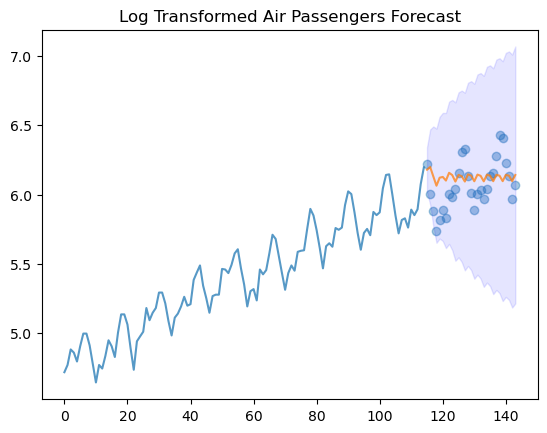

In [16]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

**ARCH 모델**

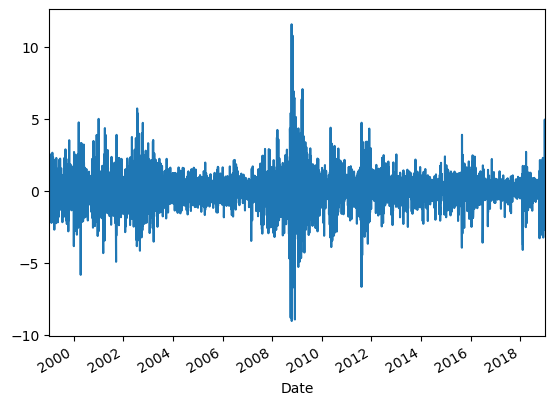

In [17]:
# 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

In [18]:
# ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며,
# p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.28114236985
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477481819
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476989039
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Fri, Jan 09 2026   Df Residuals:                     5029
Time:           